<a href="https://colab.research.google.com/github/mjgalaz/mjgalaz-Spotify-2023-Hypothesis-Testing/blob/main/Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**conectar/importar datos desde BigQuery**

In [2]:
from google.colab import auth
auth.authenticate_user()

project_id="proyecto-02-404519"

from google.cloud import bigquery
client= bigquery.Client(project=project_id)

dataset_ref= client.dataset("data_set",project="proyecto-02-404519")
dataset= client.get_dataset(dataset_ref)

table_ref=dataset_ref.table("tabla_final_con_conteo_artistas")
table=client.get_table(table_ref)

table.schema

client.list_rows(table).to_dataframe ()



,track_id_normalizado,track_name_normalizado,artist_s__name_normalizado,artist_count,in_spotify_playlists,in_spotify_charts,fecha_completa_lanzamiento,streams_limpio,in_apple_playlists,in_apple_charts,...,cat_fin_energy,cat_fin_acousticness,cat_fin_instrumentalness,cat_fin_liveness,cat_fin_speechiness,cat_fin_bpm,cat_fin_streams_limpio,sum_playlists,sum_streams_por_artista,n_canciones_por_artista
0,2773298,dont you worry,david guetta shakira black eyed peas,3,2442,0,2022-06-16,240918092,81,4,...,Alto,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,2771,240918092,1
1,8360758,kiss me more feat sza,sza doja cat,2,15867,0,2021-04-09,1575467011,382,65,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,16746,1575467011,1
2,7792660,wait a minute,willow,1,11985,0,2015-01-11,924193303,79,80,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,12314,924193303,1
3,2079388,meet me at our spot,the anxiety willow tyler cole,3,6734,0,2020-03-13,530511203,47,14,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,6871,530511203,1
4,1660982,seo,shawn mendes camila cabello,2,15010,2,2019-06-19,2484812918,453,50,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,17248,2484812918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,8471839,wouldve couldve shouldve,taylor swift,1,1715,0,2022-10-21,177503916,4,5,...,Alto,Bajo,Bajo,Bajo,Bajo,Alto,Bajo,1727,14053658300,34
942,6590514,mastermind,taylor swift,1,1936,0,2022-10-21,218320587,7,5,...,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,1956,14053658300,34
943,2362023,cruel summer,taylor swift,1,7858,100,2019-08-23,800840817,116,207,...,Bajo,Bajo,Bajo,Bajo,Bajo,Alto,Alto,8099,14053658300,34
944,2031309,shake it off,taylor swift,1,21335,13,2014-01-01,1113838873,328,70,...,Alto,Bajo,Bajo,Bajo,Bajo,Alto,Alto,23041,14053658300,34


**Definición de dataframe**

In [3]:
# Leer la tabla en un DataFrame
df = client.list_rows(table).to_dataframe()

**REGRESIÓN LINEAl H1**"Las canciones con un mayor BPM (Beats Por Minuto) tienen más éxito en términos de cantidad de streams en Spotify".


*   streams_limpio
*   bpm



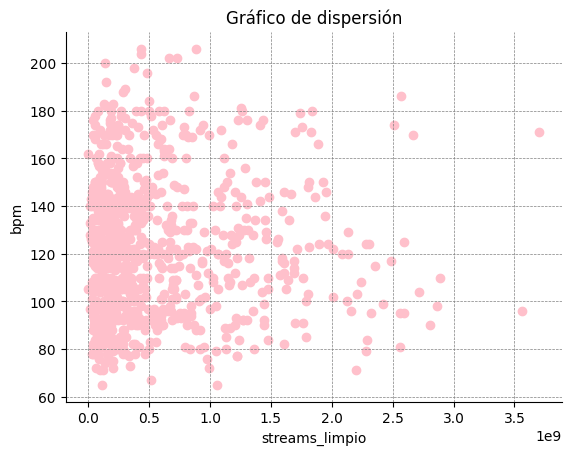

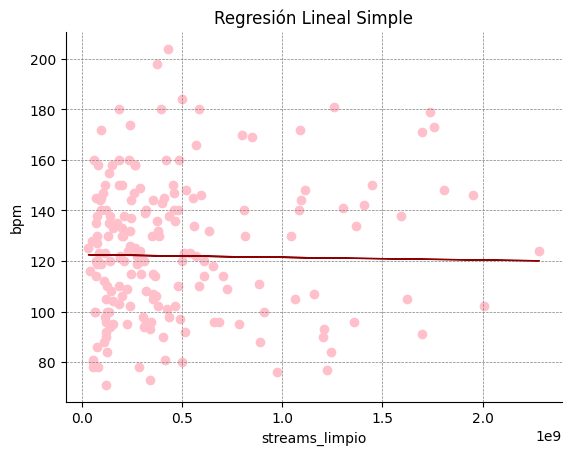


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-1.05680381e-09]]
Valor de la intersección o coeficiente "b":
[122.50122007]

La ecuación del modelo es igual a:
Y = [[-1.05680381e-09]] X + [122.50122007]

Precisión del modelo:
0.0004932667226871246


In [4]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame

# Seleccionar la columna 'streams_limpio'
X = df[['streams_limpio']]
Y = df[['bpm']]

# Gráfico de dispersión con puntos rosados y grilla punteada en gris
plt.scatter(X, Y, color='pink')
plt.xlabel("streams_limpio")
plt.ylabel("bpm")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

# Dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

# Separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Definir el algoritmo a utilizar
lr = linear_model.LinearRegression()

# Entrenar el modelo
lr.fit(X_train, Y_train)

# Realizar predicción
Y_pred = lr.predict(X_test)

# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("bpm")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Imprimir datos del modelo de regresión lineal simple
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y =', lr.coef_, 'X +', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, Y_train))



**H1 CON FILTRO 2O22**

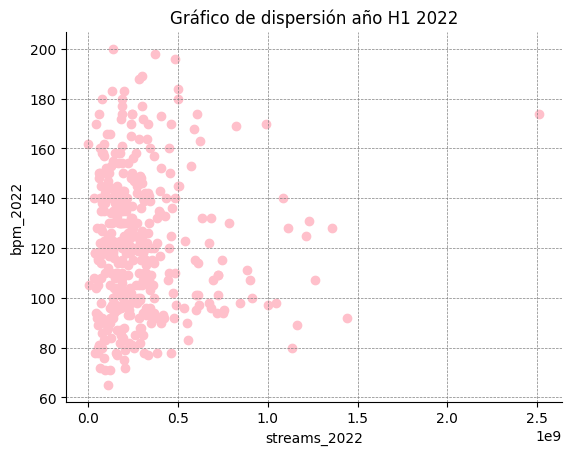

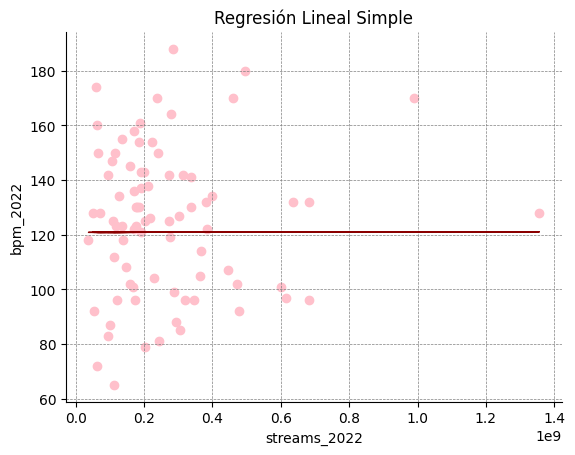


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[1.34646542e-10]]
Valor de la intersección o coeficiente "b":
[120.84424147]

La ecuación del modelo es igual a:
Y = [[1.34646542e-10]] X + [120.84424147]

Precisión del modelo:
1.7004970028766664e-06
Valor de streams_limpio con el máximo número de streams: 2513188493
Correspondiente valor de artist_s__name_normalizado: harry styles
Correspondiente valor de atrack_name_normalizado: as it was


In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame

# Convertir la columna 'fecha_completa_lanzamiento' a formato de fecha
df['fecha_completa_lanzamiento'] = pd.to_datetime(df['fecha_completa_lanzamiento'])

# Filtrar las filas donde el año sea 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]

# Seleccionar la columna 'streams_limpio' y 'bpm' solo para las filas del año 2022
X = df_2022[['streams_limpio']]
Y = df_2022[['bpm']]

#grafico dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel("streams_2022")
plt.ylabel("bpm_2022")
# Título del gráfico
plt.title("Gráfico de dispersión año H1 2022")
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

# IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

# dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

# separar los datos de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# definir el algoritmo a utilizar
lr = linear_model.LinearRegression()

# Entrenar el modelo
lr.fit(X_train, Y_train)

# realizar predicción
Y_pred = lr.predict(X_test)

# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_2022")
plt.ylabel("bpm_2022")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Imprimir datos del modelo de regresión lineal simple
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y =', lr.coef_, 'X +', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, Y_train))

# Obtener el índice del valor máximo en 'streams_limpio'
max_streams_index = df_2022['streams_limpio'].idxmax()

# Obtener el valor de 'streams_limpio' con el máximo número de streams
max_streams_value = df_2022.loc[max_streams_index, 'streams_limpio']

# Obtener el correspondiente valor de 'artist_s__name_normalizado'
corresponding_artist = df_2022.loc[max_streams_index, 'artist_s__name_normalizado']
corresponding_song = df_2022.loc[max_streams_index, 'track_name_normalizado']
# Imprimir los resultados
print(f'Valor de streams_limpio con el máximo número de streams: {max_streams_value}')
print(f'Correspondiente valor de artist_s__name_normalizado: {corresponding_artist}')
print(f'Correspondiente valor de atrack_name_normalizado: {corresponding_song}')

**REGRESIÓN LINEAR H2**"Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas como Deezer."


*   in_spotify_charts
*   in_apple_charts


*   in_spotify_charts
*   in_deezer_charts





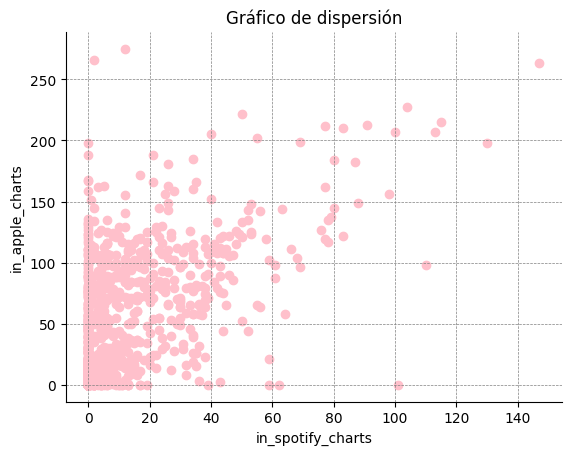

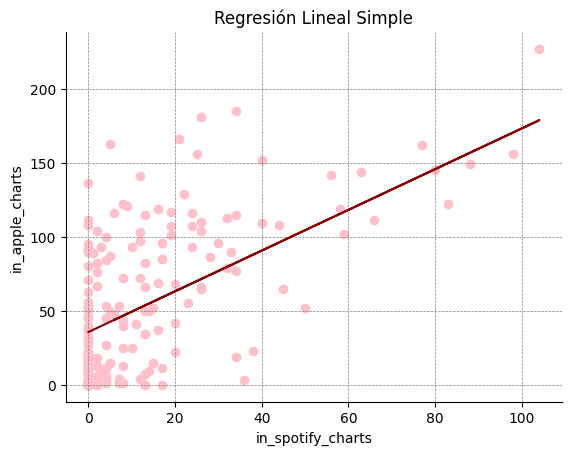


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[1.37605675]]
Valor de la intersección o coeficiente "b":
[35.62147028]

La ecuación del modelo es igual a:
Y= [[1.37605675]] X [35.62147028]

Presición del  modelo:
0.28359893725796914


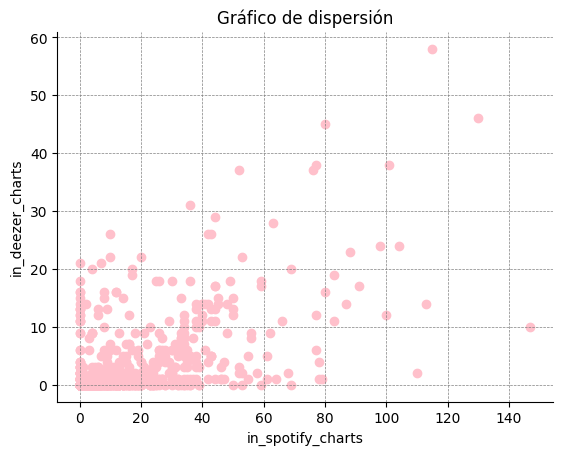

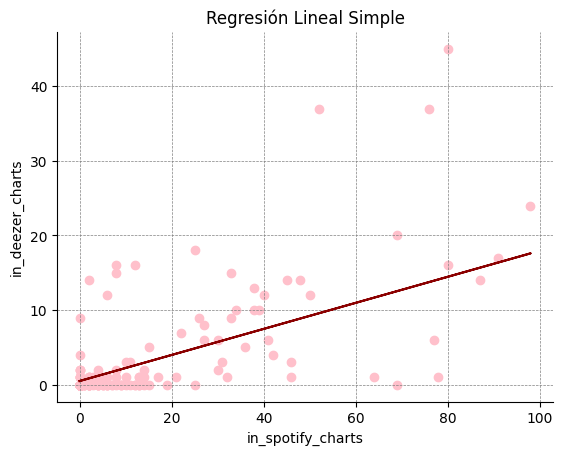


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[0.17446778]]
Valor de la intersección o coeficiente "b":
[0.50308264]

La ecuación del modelo es igual a:
Y= [[0.17446778]] X [0.50308264]

Presición del  modelo:
0.33183870461852694


In [7]:
#[in_spotify_charts,in_apple_charts]

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame


X = df[['in_spotify_charts']]
Y=  df[['in_apple_charts']]

#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("in_spotify_charts")
plt.ylabel ("in_apple_charts")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train, Y_train)

#realiza prediccion
Y_pred=lr.predict(X_test)

# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("in_spotify_charts")
plt.ylabel("in_apple_charts")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)

print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)

print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[in_spotify_charts,in_deezer_charts]

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame


X = df[['in_spotify_charts']]
Y=  df[['in_deezer_charts']]

#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("in_spotify_charts")
plt.ylabel ("in_deezer_charts")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train, Y_train)

#realiza prediccion
Y_pred=lr.predict(X_test)

# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("in_spotify_charts")
plt.ylabel("in_deezer_charts")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)

print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)

print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

**REGRESIÓN LINEAR H3**"La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams".

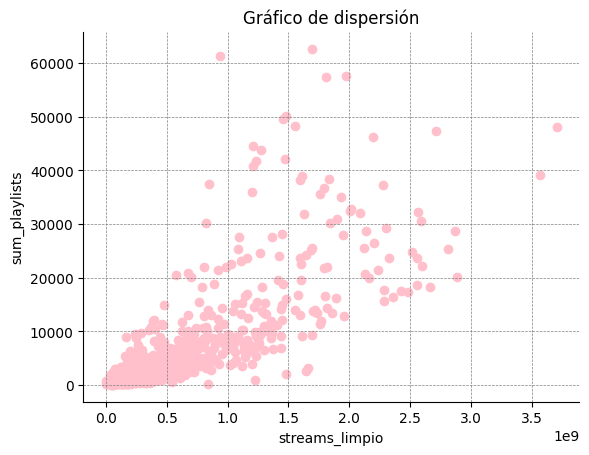

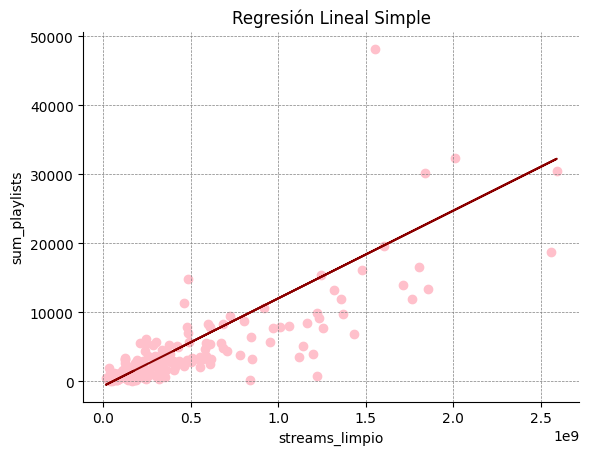


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[1.27027027e-05]]
Valor de la intersección o coeficiente "b":
[-664.06025098]

La ecuación del modelo es igual a:
Y= [[1.27027027e-05]] X [-664.06025098]

Presición del  modelo:
0.6151059493209564


In [8]:
#[streams_limpio,sum_playlists]

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame


X = df[['streams_limpio']]
Y=  df[['sum_playlists']]

#grafico dispersion
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("sum_playlists")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE

#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split

#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)

#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train, Y_train)

#realiza prediccion
Y_pred=lr.predict(X_test)

# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("sum_playlists")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)

print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)

print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))





**REGRESIÓN LINEAR H4**"Los artistas con un mayor número de canciones en Spotify tienen más streams totales".


*   sum streams_limpio
*   n_canciones_por_artista



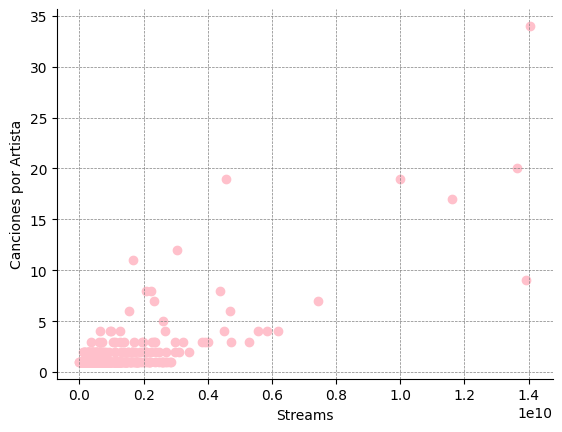

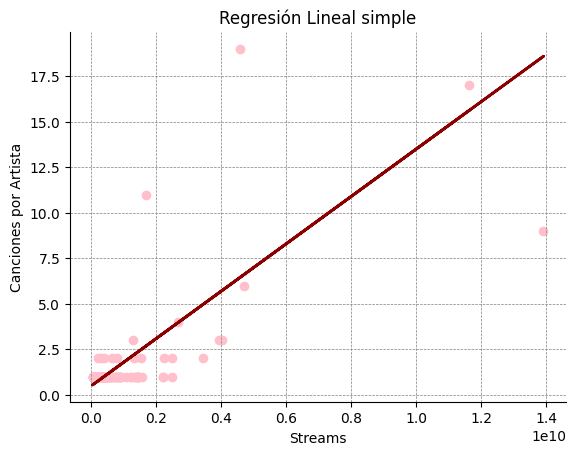


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[1.3014201e-09]]
Valor de la intersección o coeficiente "b":
[0.49380695]

La ecuación del modelo es igual a:
y = [[1.3014201e-09]] x [0.49380695]

Precisión del modelo:
0.6427481420520373


In [9]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

total_streams_por_artista = df.groupby('artist_s__name_normalizado')['streams_limpio'].sum()
# Convertir a DataFrame
E = pd.DataFrame({'Streams': total_streams_por_artista.values})
# Obtener las frecuencias y ordenar alfabéticamente por el nombre del artista
I = df['artist_s__name_normalizado'].value_counts().sort_index()
# Convertir a DataFrame
J = pd.DataFrame({'CancionesporArtista': I.values})
# Grafico
plt.scatter(E, J,color='pink')
plt.xlabel("Streams")
plt.ylabel("Canciones por Artista")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()
# IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
# Dividir la data en "entrenamiento" y "test"
from sklearn.model_selection import train_test_split
# Separar los datos de "train" en entrenamiento y prueba para probar algoritmos
E_train, E_test, J_train, J_test = train_test_split(E, J, test_size=0.2)
# Definir el algoritmo a utilizar
lr = linear_model.LinearRegression()
# Entrenar el modelo
lr.fit(E_train, J_train)
J_pred = lr.predict(E_test)
# Graficar los datos junto con el modelo
plt.scatter(E_test, J_test,color='pink')
plt.plot(E_test, J_pred, color='darkred', linewidth=2)
plt.title('Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel('Canciones por Artista')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()
print('Datos del modelo Regresión Lineal Simple')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(E_train, J_train))

**REGRESIÓN LINEAR H5 TOTAL**"Las características de la música influyen en el éxito en términos de cantidad de streams en Spotify"


*   streams_limpio, danceability__
*   streams_limpio, valence__
*   streams_limpio, energy__
*   streams_limpio,acousticness__
*   streams_limpio,instrumentalness__
*   streams_limpio,liveness__
*  streams_limpio,speechiness__

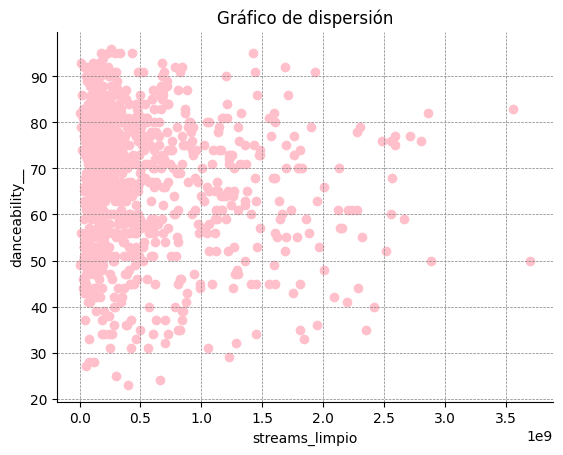

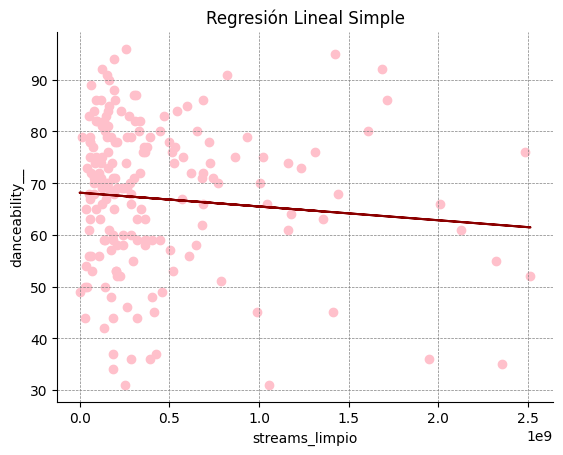


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-2.67014406e-09]]
Valor de la intersección o coeficiente "b":
[68.16411522]

La ecuación del modelo es igual a:
Y= [[-2.67014406e-09]] X [68.16411522]

Presición del  modelo:
0.011023032055249016


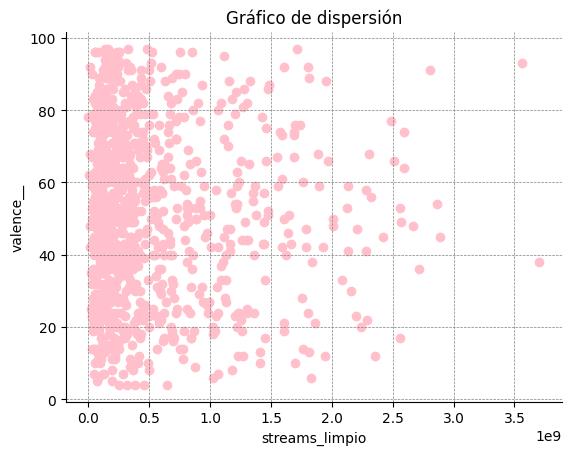

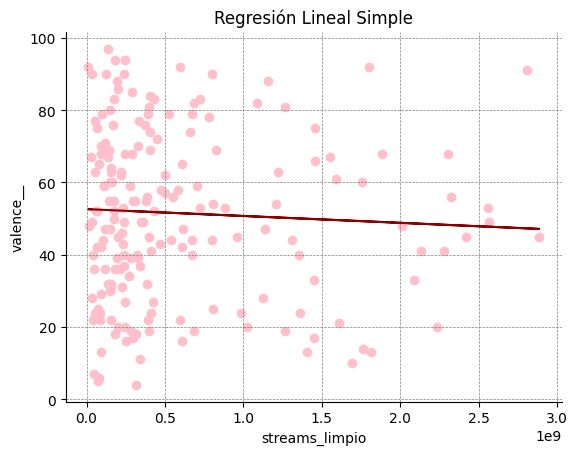


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-1.89786935e-09]]
Valor de la intersección o coeficiente "b":
[52.6222635]

La ecuación del modelo es igual a:
Y= [[-1.89786935e-09]] X [52.6222635]

Presición del  modelo:
0.001910728092316405


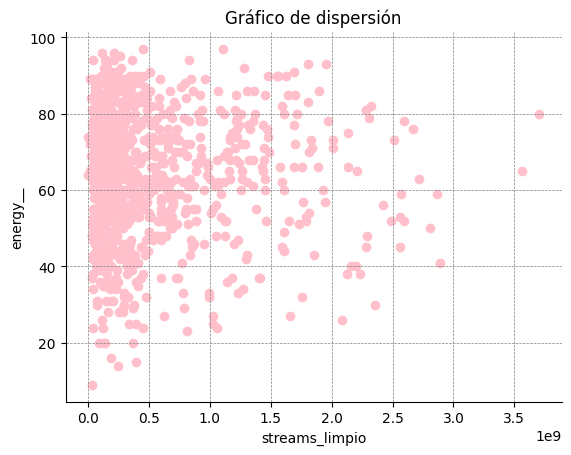

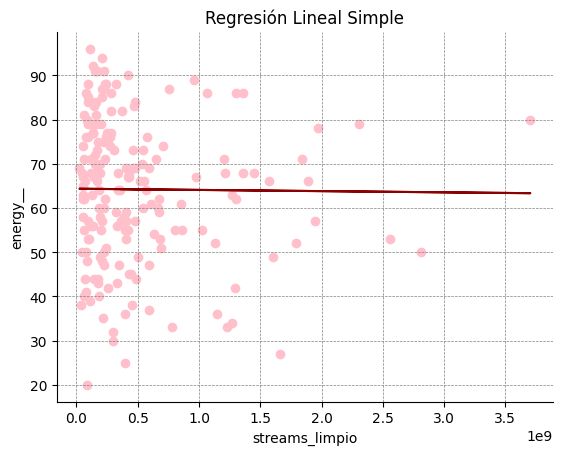


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-2.73735548e-10]]
Valor de la intersección o coeficiente "b":
[64.35077906]

La ecuación del modelo es igual a:
Y= [[-2.73735548e-10]] X [64.35077906]

Presición del  modelo:
8.765424057455284e-05


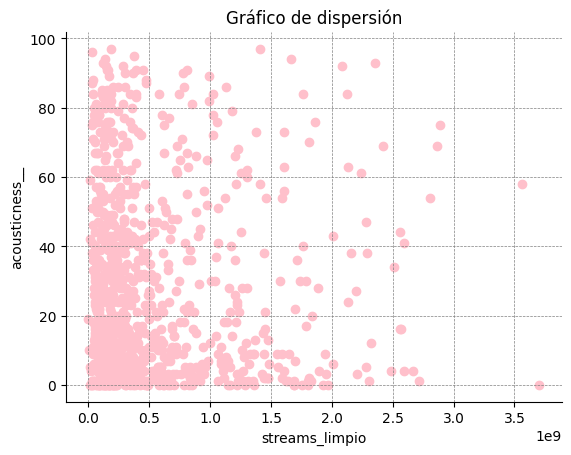

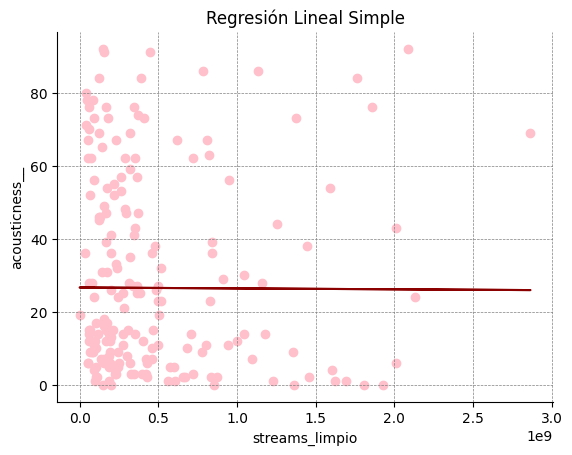


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-2.46134496e-10]]
Valor de la intersección o coeficiente "b":
[26.63503955]

La ecuación del modelo es igual a:
Y= [[-2.46134496e-10]] X [26.63503955]

Presición del  modelo:
3.075679863462355e-05


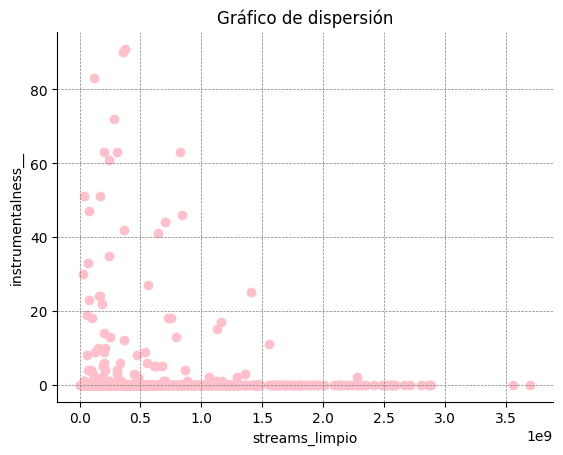

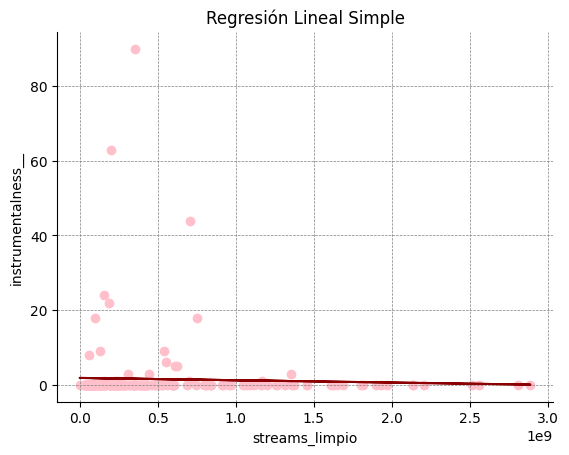


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-6.20686414e-10]]
Valor de la intersección o coeficiente "b":
[1.83916899]

La ecuación del modelo es igual a:
Y= [[-6.20686414e-10]] X [1.83916899]

Presición del  modelo:
0.0017911123617790903


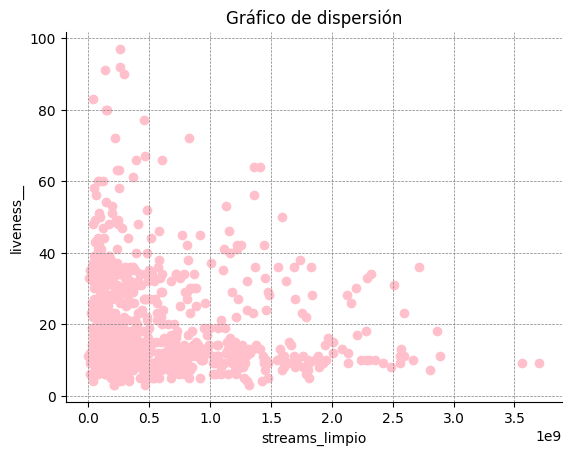

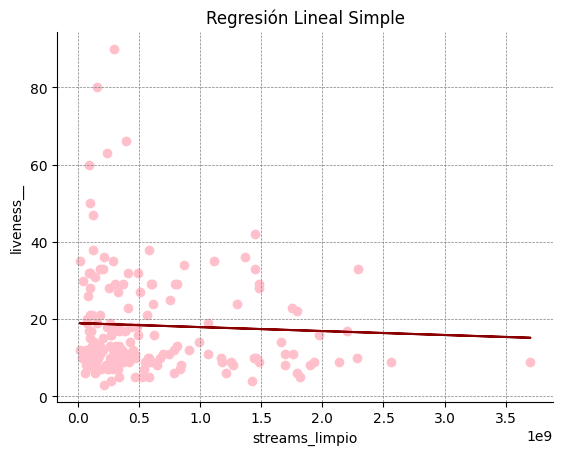


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-1.02174951e-09]]
Valor de la intersección o coeficiente "b":
[18.95440875]

La ecuación del modelo es igual a:
Y= [[-1.02174951e-09]] X [18.95440875]

Presición del  modelo:
0.001694791746914004


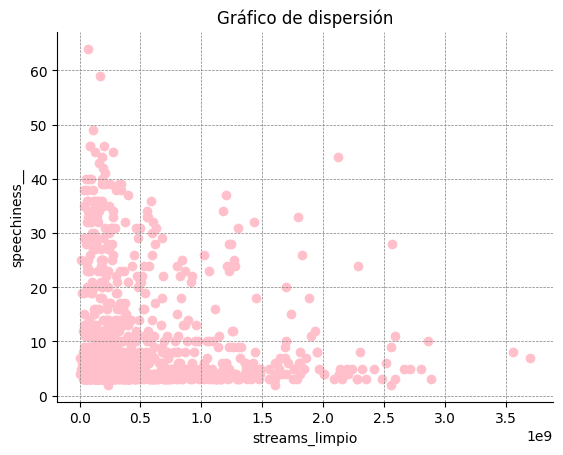

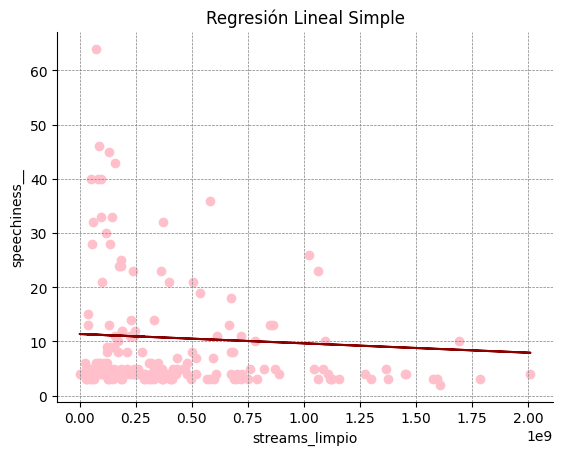


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-1.7206339e-09]]
Valor de la intersección o coeficiente "b":
[11.36909096]

La ecuación del modelo es igual a:
Y= [[-1.7206339e-09]] X [11.36909096]

Presición del  modelo:
0.010885055595534876


In [10]:
#[streams_limpio,danceability__]

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
X = df[['streams_limpio']]
Y=  df[['danceability__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("danceability__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("danceability__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,valence__]

X = df[['streams_limpio']]
Y=  df[['valence__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("valence__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("valence__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,energy__]

X = df[['streams_limpio']]
Y=  df[['energy__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("energy__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("energy__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,acousticness__]

X = df[['streams_limpio']]
Y=  df[['acousticness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("acousticness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("acousticness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,instrumentalness__]

X = df[['streams_limpio']]
Y=  df[['instrumentalness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("instrumentalness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("instrumentalness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,liveness__]

X = df[['streams_limpio']]
Y=  df[['liveness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("liveness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("liveness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,speechiness__]

X = df[['streams_limpio']]
Y=  df[['speechiness__']]
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("speechiness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("speechiness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

**REGRESIÓN LINEAR H5 AÑO 2022**"Las características de la música influyen en el éxito en términos de cantidad de streams en Spotify"


*   streams_limpio, danceability__
*   streams_limpio, valence__
*   streams_limpio, energy__
*   streams_limpio,acousticness__
*   streams_limpio,instrumentalness__
*   streams_limpio,liveness__
*  streams_limpio,speechiness__

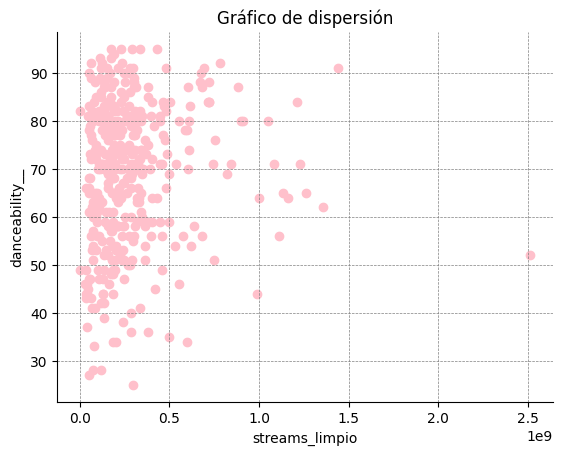

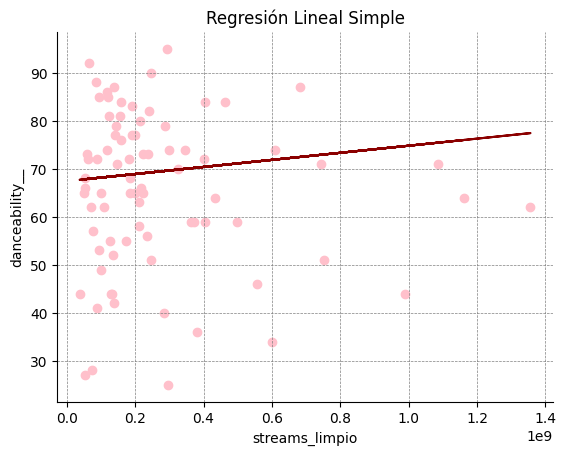


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[7.37137364e-09]]
Valor de la intersección o coeficiente "b":
[67.43447824]

La ecuación del modelo es igual a:
Y= [[7.37137364e-09]] X [67.43447824]

Presición del  modelo:
0.017479595277329008


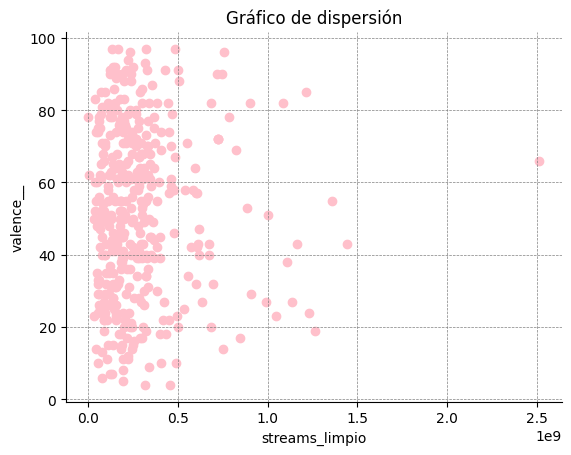

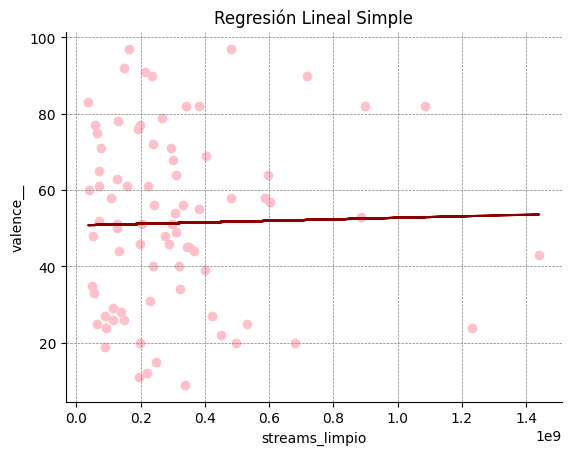


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[1.99938758e-09]]
Valor de la intersección o coeficiente "b":
[50.73367545]

La ecuación del modelo es igual a:
Y= [[1.99938758e-09]] X [50.73367545]

Presición del  modelo:
0.00048594512380262245


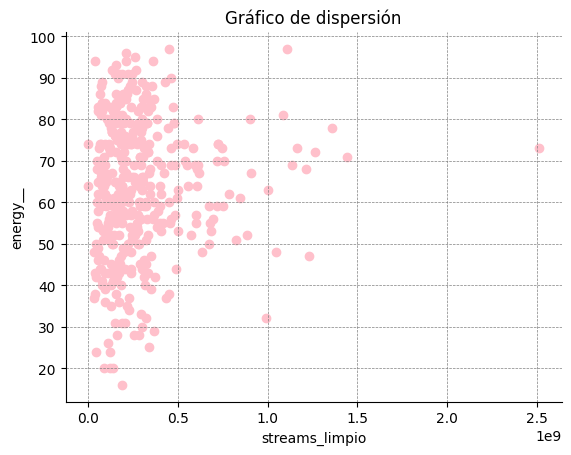

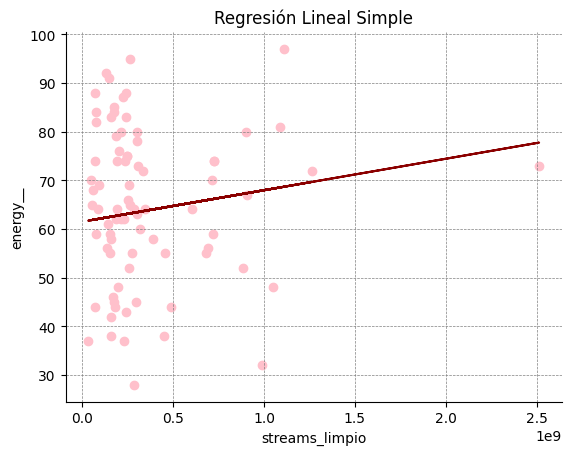


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[6.46459008e-09]]
Valor de la intersección o coeficiente "b":
[61.48949905]

La ecuación del modelo es igual a:
Y= [[6.46459008e-09]] X [61.48949905]

Presición del  modelo:
0.006978363221380346


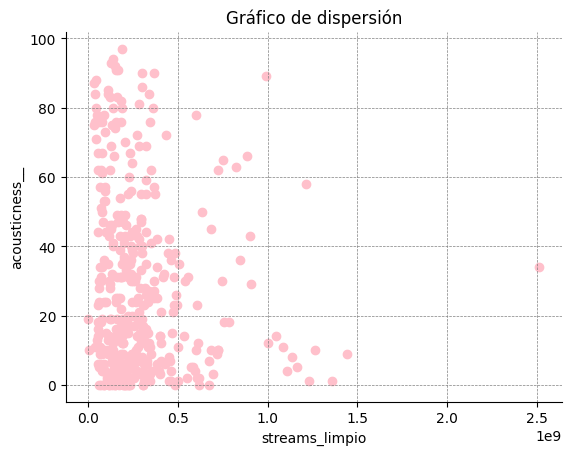

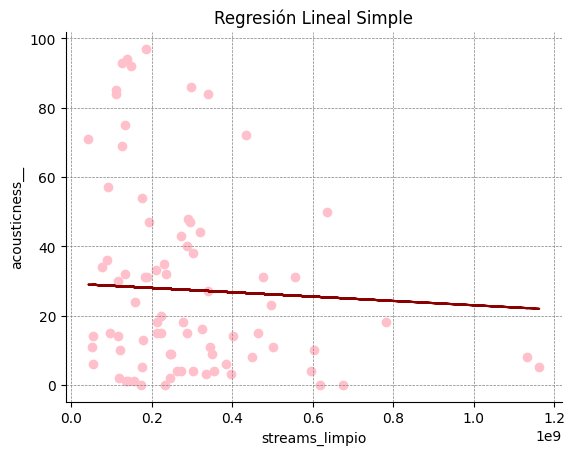


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-6.23860614e-09]]
Valor de la intersección o coeficiente "b":
[29.20005576]

La ecuación del modelo es igual a:
Y= [[-6.23860614e-09]] X [29.20005576]

Presición del  modelo:
0.004495616746020836


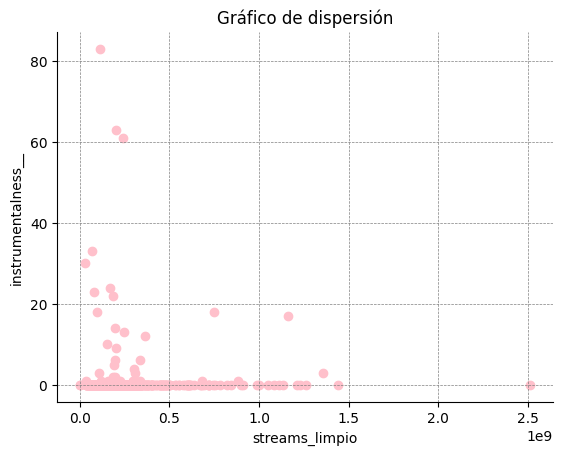

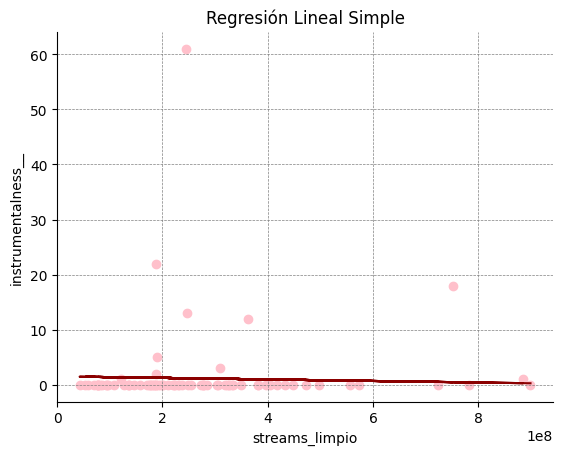


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-1.39409891e-09]]
Valor de la intersección o coeficiente "b":
[1.52939481]

La ecuación del modelo es igual a:
Y= [[-1.39409891e-09]] X [1.52939481]

Presición del  modelo:
0.0031607408554205074


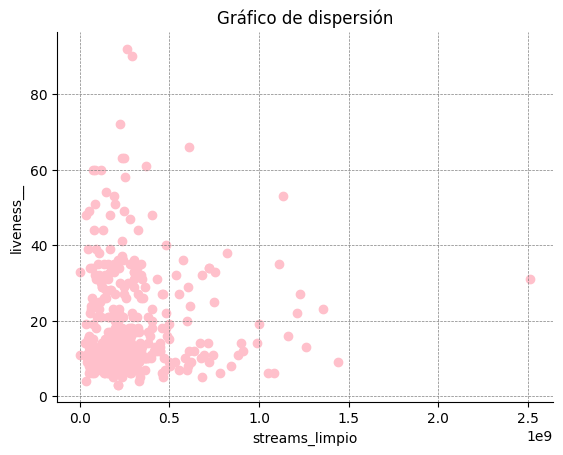

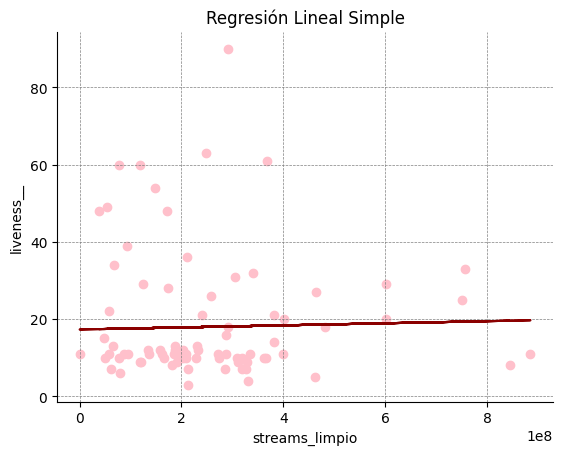


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[2.69373354e-09]]
Valor de la intersección o coeficiente "b":
[17.31171861]

La ecuación del modelo es igual a:
Y= [[2.69373354e-09]] X [17.31171861]

Presición del  modelo:
0.003358045580524771


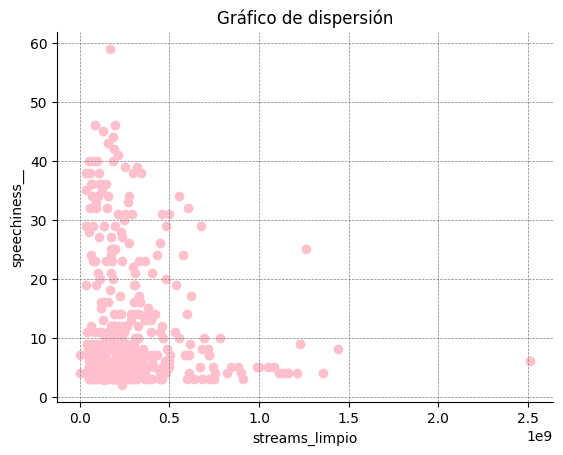

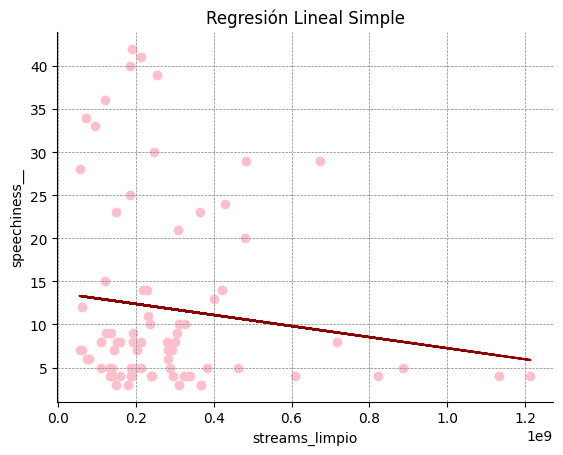


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-6.41817041e-09]]
Valor de la intersección o coeficiente "b":
[13.66737956]

La ecuación del modelo es igual a:
Y= [[-6.41817041e-09]] X [13.66737956]

Presición del  modelo:
0.023583718854259694


In [11]:
#[streams_limpio,danceability__]

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]

# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, danceability__]

    X = df_2022[['streams_limpio']]
    Y = df_2022[['danceability__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("danceability__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("danceability__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,valence__]

# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, valence__]
    X = df_2022[['streams_limpio']]
    Y = df_2022[['valence__']]
    #grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("valence__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("valence__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,energy__]

# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, energy__]
    X = df_2022[['streams_limpio']]
    Y = df_2022[['energy__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("energy__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("energy__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,acousticness__]
# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, acousticness__]
    X = df_2022[['streams_limpio']]
    Y = df_2022[['acousticness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("acousticness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("acousticness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,instrumentalness__]
# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, instrumentalness__]
    X = df_2022[['streams_limpio']]
    Y = df_2022[['instrumentalness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("instrumentalness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("instrumentalness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,liveness__]
# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, liveness__]
    X = df_2022[['streams_limpio']]
    Y = df_2022[['liveness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("liveness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("liveness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,speechiness__]
# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]
# Verificar si hay datos para el año 2022
if not df_2022.empty:
    # [streams_limpio, speechiness__]
    X = df_2022[['streams_limpio']]
    Y = df_2022[['speechiness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("speechiness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("speechiness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

**REGRESIÓN LINEAR H5 AÑO 2023**"Las características de la música influyen en el éxito en términos de cantidad de streams en Spotify"


*   streams_limpio, danceability__
*   streams_limpio, valence__
*   streams_limpio, energy__
*   streams_limpio,acousticness__
*   streams_limpio,instrumentalness__
*   streams_limpio,liveness__
*  streams_limpio,speechiness__

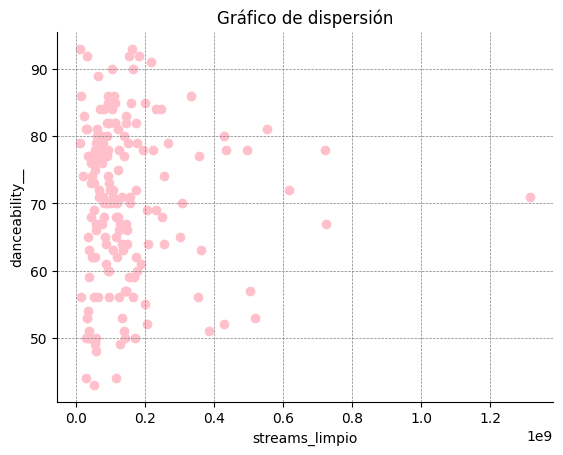

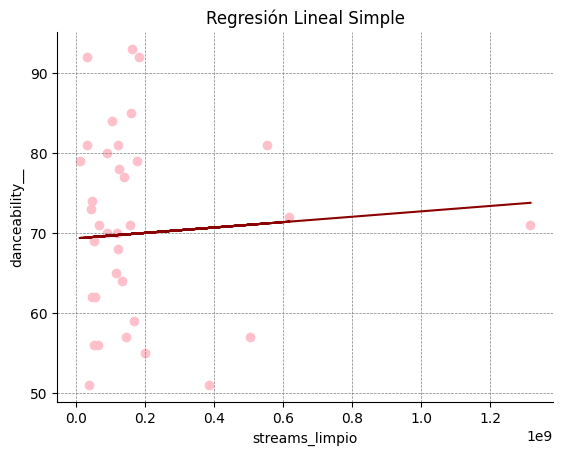


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[3.37300814e-09]]
Valor de la intersección o coeficiente "b":
[69.30526899]

La ecuación del modelo es igual a:
Y= [[3.37300814e-09]] X [69.30526899]

Presición del  modelo:
0.00119093800824277


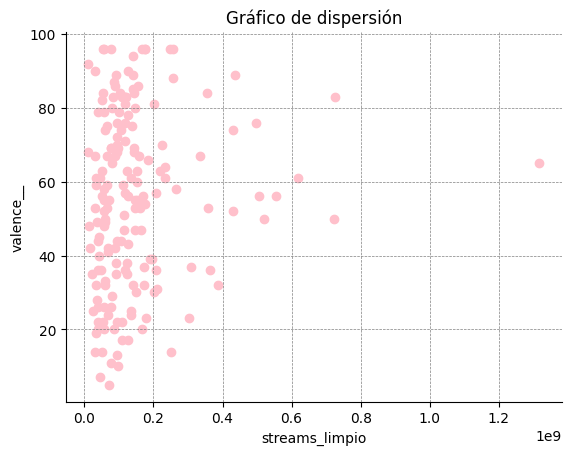

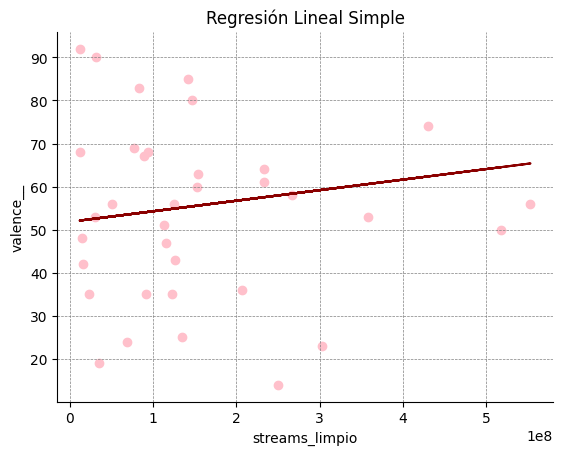


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[2.44722892e-08]]
Valor de la intersección o coeficiente "b":
[51.83487058]

La ecuación del modelo es igual a:
Y= [[2.44722892e-08]] X [51.83487058]

Presición del  modelo:
0.024702884722679563


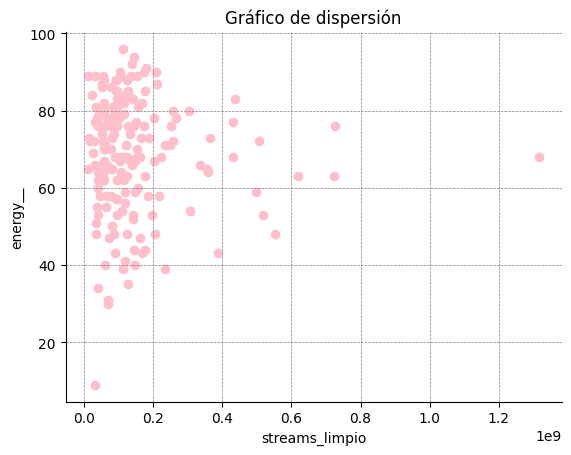

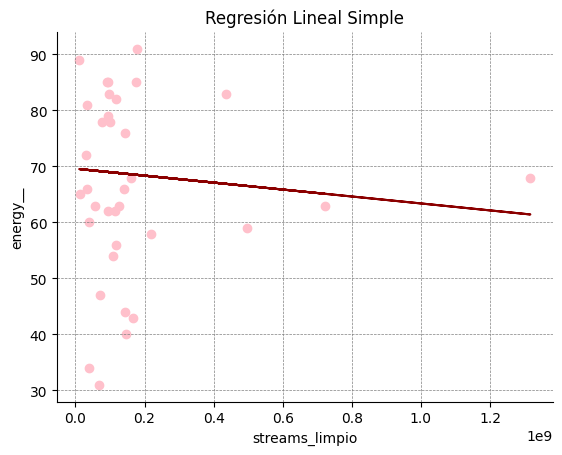


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-6.20682462e-09]]
Valor de la intersección o coeficiente "b":
[69.58916888]

La ecuación del modelo es igual a:
Y= [[-6.20682462e-09]] X [69.58916888]

Presición del  modelo:
0.0026159460620939212


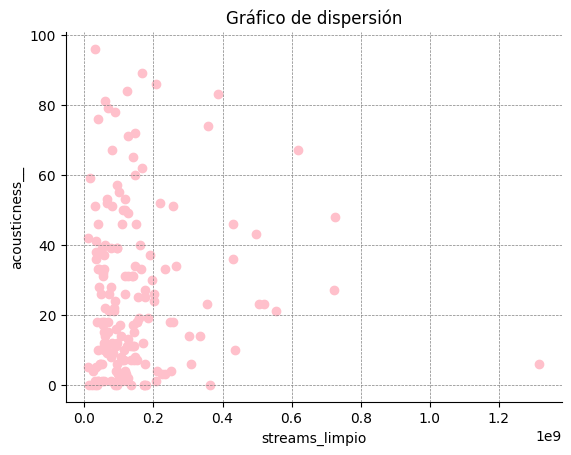

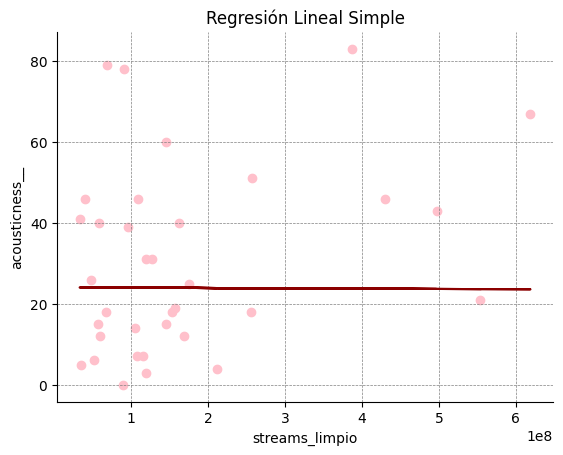


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-7.75416201e-10]]
Valor de la intersección o coeficiente "b":
[24.06021573]

La ecuación del modelo es igual a:
Y= [[-7.75416201e-10]] X [24.06021573]

Presición del  modelo:
2.7851242494714157e-05


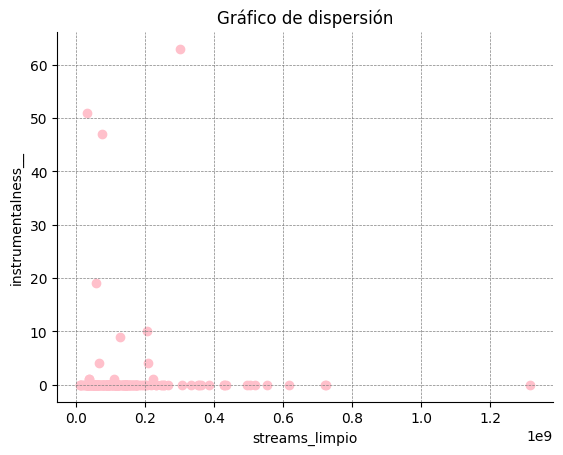

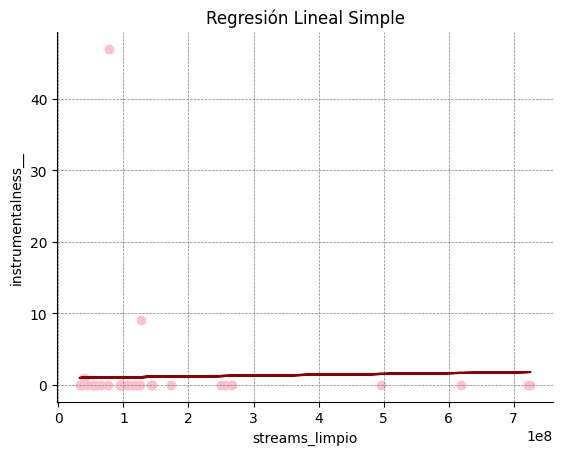


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[1.1675677e-09]]
Valor de la intersección o coeficiente "b":
[0.93335477]

La ecuación del modelo es igual a:
Y= [[1.1675677e-09]] X [0.93335477]

Presición del  modelo:
0.0005844537454247067


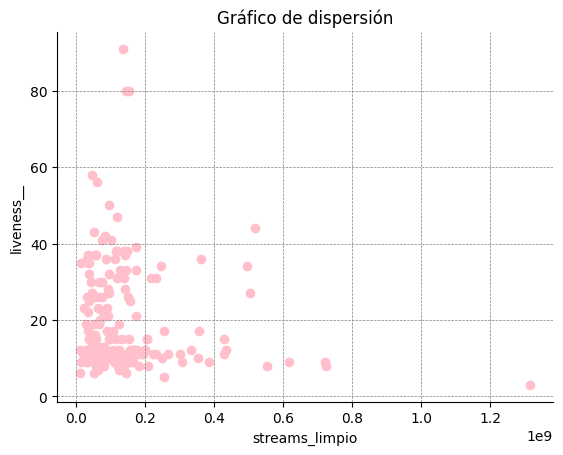

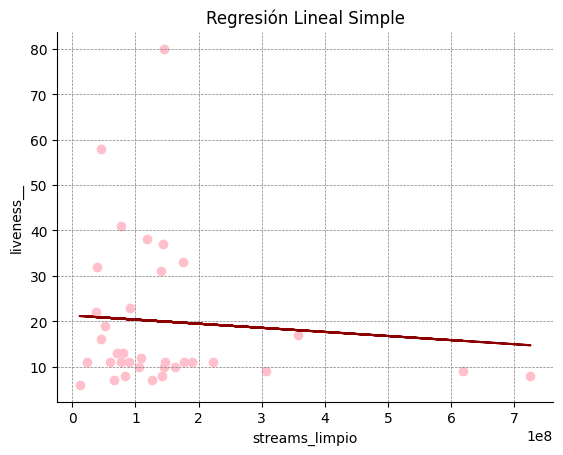


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-9.02618027e-09]]
Valor de la intersección o coeficiente "b":
[21.25667919]

La ecuación del modelo es igual a:
Y= [[-9.02618027e-09]] X [21.25667919]

Presición del  modelo:
0.010308563830461082


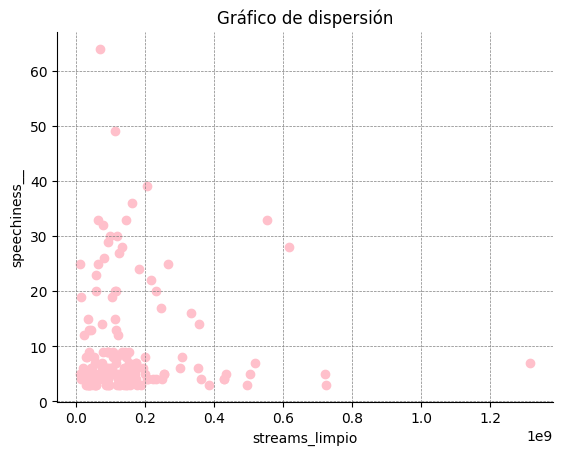

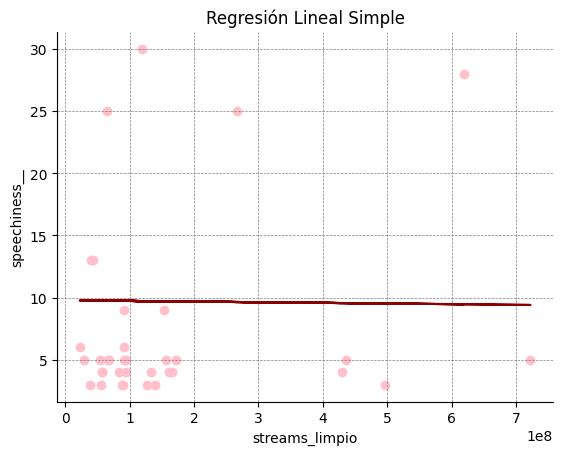


DATOS MODELO REGRESION LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[[-5.15354623e-10]]
Valor de la intersección o coeficiente "b":
[9.78858187]

La ecuación del modelo es igual a:
Y= [[-5.15354623e-10]] X [9.78858187]

Presición del  modelo:
5.9811964773004433e-05


In [12]:
#[streams_limpio,danceability__]

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]

# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, danceability__]

    X = df_2023[['streams_limpio']]
    Y = df_2023[['danceability__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("danceability__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("danceability__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,valence__]

# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, valence__]
    X = df_2023[['streams_limpio']]
    Y = df_2023[['valence__']]
    #grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("valence__")
 # Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("valence__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,energy__]

# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, energy__]
    X = df_2023[['streams_limpio']]
    Y = df_2023[['energy__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("energy__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("energy__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,acousticness__]
# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, acousticness__]
    X = df_2023[['streams_limpio']]
    Y = df_2023[['acousticness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("acousticness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("acousticness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,instrumentalness__]
# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, instrumentalness__]
    X = df_2023[['streams_limpio']]
    Y = df_2023[['instrumentalness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("instrumentalness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("instrumentalness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,liveness__]
# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, liveness__]
    X = df_2023[['streams_limpio']]
    Y = df_2023[['liveness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("liveness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("liveness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

#[streams_limpio,speechiness__]
# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]
# Verificar si hay datos para el año 2023
if not df_2023.empty:
    # [streams_limpio, speechiness__]
    X = df_2023[['streams_limpio']]
    Y = df_2023[['speechiness__']]
#grafico de dispersión
plt.scatter(X, Y, color='pink')
plt.xlabel ("streams_limpio")
plt.ylabel ("speechiness__")
# Título del gráfico
plt.title("Gráfico de dispersión")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
#dividir la data en “entrenamiento” y “test”
from sklearn.model_selection import train_test_split
#separar los datos  de "train" en entrenamiento de prueba y prueba para probar algoritmos
X_train, X_test,Y_train, Y_test =train_test_split(X,Y, test_size=0.2)
#definir el algoritmo a ultilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, Y_train)
#realiza prediccion
Y_pred=lr.predict(X_test)
# Graficar los datos juntos con el modelo (puntos rosados y línea negra)
plt.scatter(X_test, Y_test, color='pink')
plt.plot(X_test, Y_pred, color="darkred", linewidth=1.5)
plt.title("Regresión Lineal Simple")
plt.xlabel("streams_limpio")
plt.ylabel("speechiness__")
# Configurar la grilla punteada en gris
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#imprimir
print()
print('DATOS MODELO REGRESION LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('Y=',lr.coef_,'X', lr.intercept_)
print()
print('Presición del  modelo:')
print(lr.score(X_train,Y_train))

**H12 REGRESIÓN LINEAL**

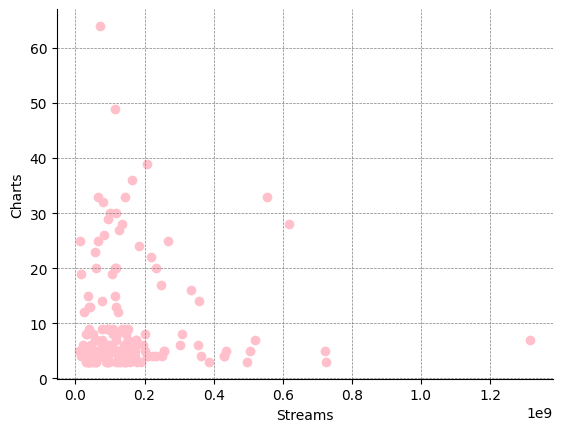

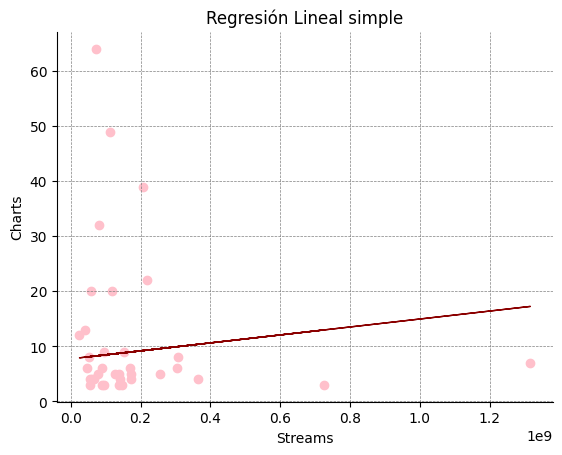


Datos del modelo Regresión Lineal Simple

Valor de la pendiente o coeficiente "a":
[[7.22482275e-09]]
Valor de la intersección o coeficiente "b":
[7.73880116]

La ecuación del modelo es igual a:
y = [[7.22482275e-09]] x [7.73880116]

Precisión del modelo:
0.012714258991903149


In [16]:
ch= df[['in_spotify_charts']]
#grafico
plt.scatter(X,Y,color= 'pink')
plt.xlabel ("Streams")
plt.ylabel ("Charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print ()
#IMPLEMENTACIÓN REGRESIÓN LINEAL SIMPLE
from sklearn.model_selection import train_test_split

# Asegúrate de que X e Y tengan la misma longitud
assert len(X) == len(Y), "Las longitudes de X e Y no coinciden"

# Utiliza Y en lugar de ch para la variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
lr=linear_model.LinearRegression()
lr.fit(X_train, Y_train)
ch_pred = lr.predict(X_test)
plt.scatter (X_test, Y_test,color='pink')
plt.plot( X_test, ch_pred, color='darkred', linewidth=1)
plt.title( 'Regresión Lineal simple')
plt.xlabel('Streams')
plt.ylabel ('Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# Ajustar para que solo se vean los ejes x e y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show ()
print()
print('Datos del modelo Regresión Lineal Simple')
print ()
print ('Valor de la pendiente o coeficiente "a":')
print (lr.coef_)
print ( 'Valor de la intersección o coeficiente "b":')
print (lr.intercept_)
print ()
print ('La ecuación del modelo es igual a:')
print ('y =', lr.coef_, 'x', lr.intercept_)
print()
print ('Precisión del modelo:')
print (lr.score (X_train, Y_train))

**H12 REGRESION 2022**

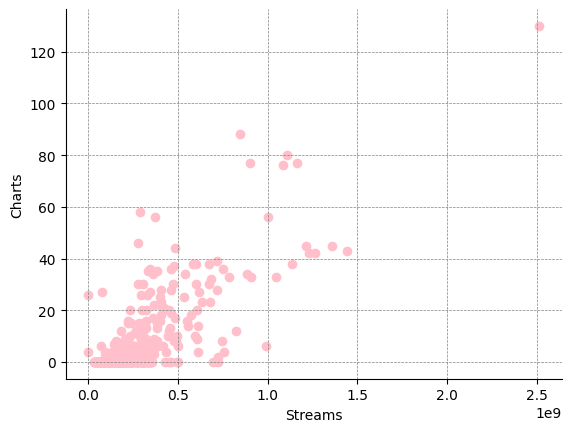

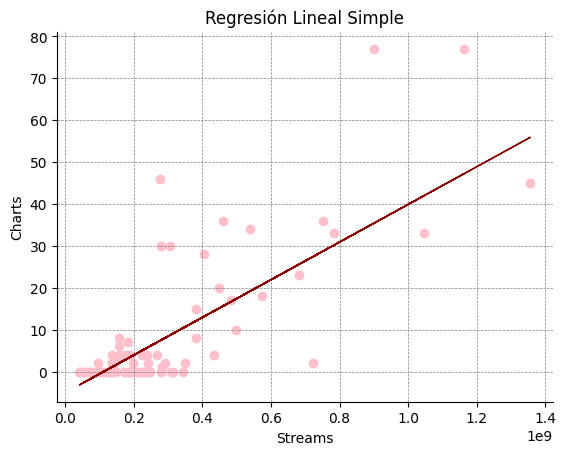


Datos del modelo Regresión Lineal Simple
Valor de la pendiente o coeficiente "a":
[[4.49220979e-08]]
Valor de la intersección o coeficiente "b":
[-5.02701286]

La ecuación del modelo es igual a:
y = [[4.49220979e-08]] x [-5.02701286]

Precisión del modelo:
0.5825255469131605


In [17]:
# Filtrar datos para el año 2022
df_2022 = df[df['fecha_completa_lanzamiento'].dt.year == 2022]

# Seleccionar las variables independiente (X) y dependiente (Y)
X = df_2022[['streams_limpio']]
Y = df_2022[['in_spotify_charts']]

# Graficar
plt.scatter(X, Y, color='pink')
plt.xlabel("Streams")
plt.ylabel("Charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()

# Implementación de la Regresión Lineal Simple
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, ch_train, ch_test = train_test_split(X, Y, test_size=0.2)

# Inicializar el modelo de regresión lineal
lr = linear_model.LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
lr.fit(X_train, ch_train)

# Predecir con los datos de prueba
ch_pred = lr.predict(X_test)

# Graficar la regresión lineal
plt.scatter(X_test, ch_test, color='pink')
plt.plot(X_test, ch_pred, color='darkred', linewidth=1)
plt.title('Regresión Lineal Simple')
plt.xlabel('Streams')
plt.ylabel('Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()

# Mostrar detalles del modelo
print('Datos del modelo Regresión Lineal Simple')
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, ch_train))

**h12 2023**

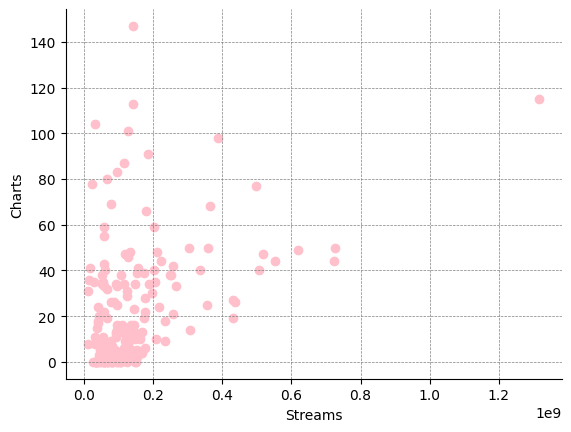

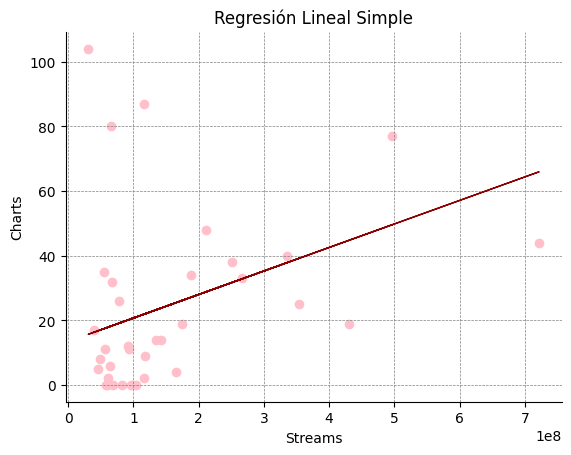


Datos del modelo Regresión Lineal Simple
Valor de la pendiente o coeficiente "a":
[[7.27722455e-08]]
Valor de la intersección o coeficiente "b":
[13.43316858]

La ecuación del modelo es igual a:
y = [[7.27722455e-08]] x [13.43316858]

Precisión del modelo:
0.1775967220386988


In [18]:
# Filtrar datos para el año 2023
df_2023 = df[df['fecha_completa_lanzamiento'].dt.year == 2023]

# Seleccionar las variables independiente (X) y dependiente (Y)
X = df_2023[['streams_limpio']]
Y = df_2023[['in_spotify_charts']]

# Graficar
plt.scatter(X, Y, color='pink')
plt.xlabel("Streams")
plt.ylabel("Charts")
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()

# Implementación de la Regresión Lineal Simple
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, ch_train, ch_test = train_test_split(X, Y, test_size=0.2)

# Inicializar el modelo de regresión lineal
lr = linear_model.LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
lr.fit(X_train, ch_train)

# Predecir con los datos de prueba
ch_pred = lr.predict(X_test)

# Graficar la regresión lineal
plt.scatter(X_test, ch_test, color='pink')
plt.plot(X_test, ch_pred, color='darkred', linewidth=1)
plt.title('Regresión Lineal Simple')
plt.xlabel('Streams')
plt.ylabel('Charts')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print()

# Mostrar detalles del modelo
print('Datos del modelo Regresión Lineal Simple')
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x', lr.intercept_)
print()
print('Precisión del modelo:')
print(lr.score(X_train, ch_train))
